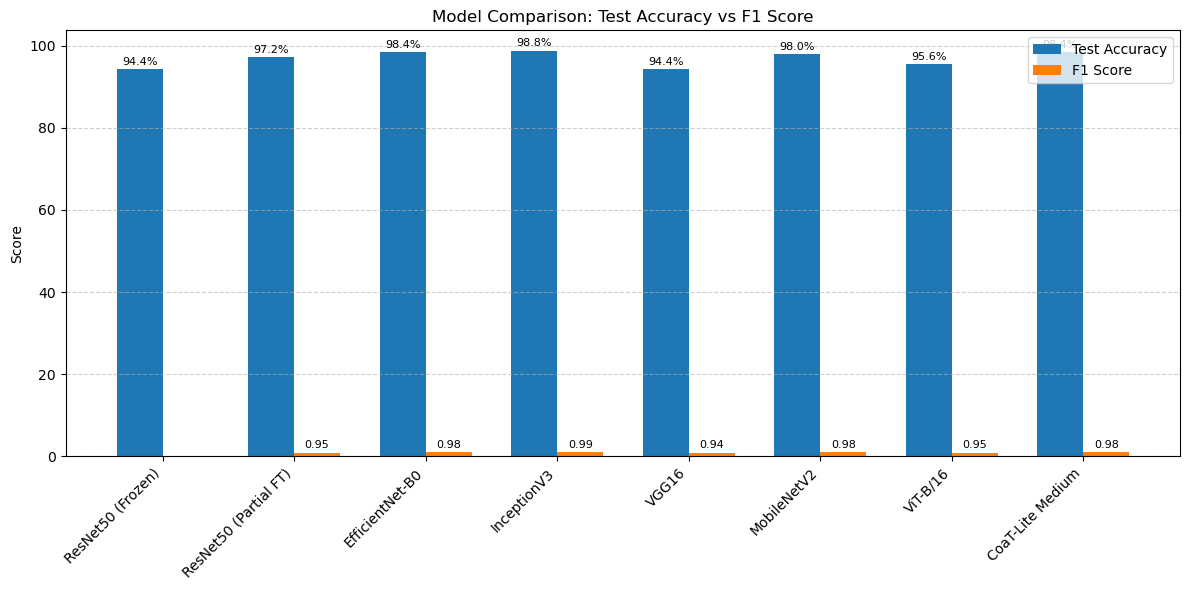

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Model results
models = [
    "ResNet50 (Frozen)", "ResNet50 (Partial FT)", "EfficientNet-B0",
    "InceptionV3", "VGG16", "MobileNetV2", "ViT-B/16", "CoaT-Lite Medium"
]
test_acc = [94.4, 97.2, 98.4, 98.8, 94.4, 98.0, 95.6, 98.4]
f1_score = [None, 0.95, 0.98, 0.99, 0.94, 0.98, 0.95, 0.98]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, test_acc, width, label='Test Accuracy')
bars2 = ax.bar(x + width/2, [f if f is not None else 0 for f in f1_score], width, label='F1 Score')

# Label bars
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3), textcoords="offset points", ha='center', fontsize=8)
for bar in bars2:
    height = bar.get_height()
    if height > 0:
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 3), textcoords="offset points", ha='center', fontsize=8)

ax.set_ylabel('Score')
ax.set_title('Model Comparison: Test Accuracy vs F1 Score')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


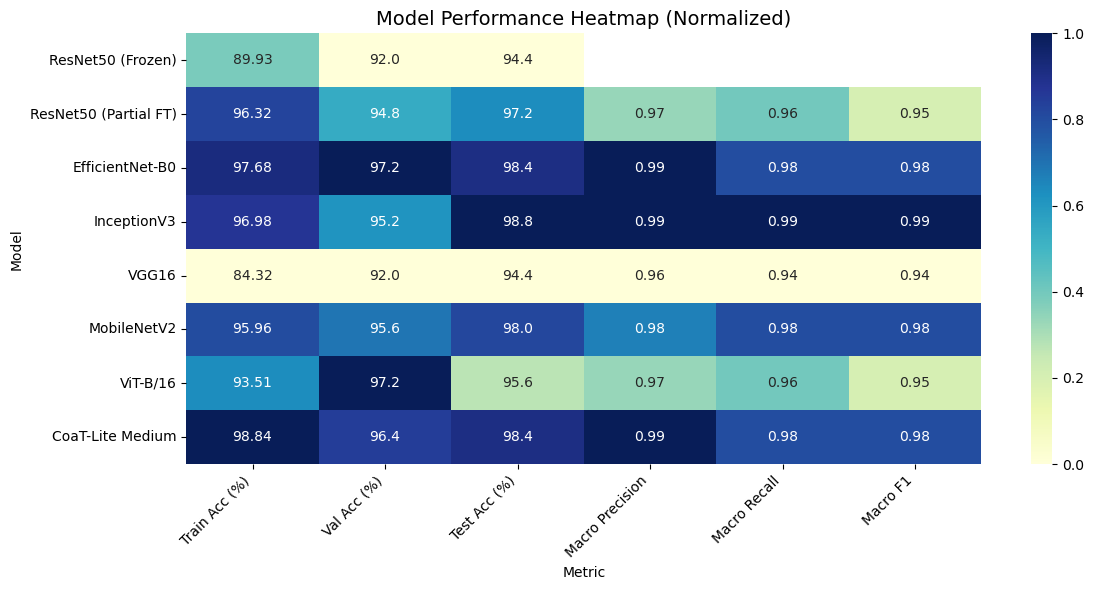

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Define model performance data ===
data = {
    "Model": [
        "ResNet50 (Frozen)", "ResNet50 (Partial FT)", "EfficientNet-B0",
        "InceptionV3", "VGG16", "MobileNetV2", "ViT-B/16", "CoaT-Lite Medium"
    ],
    "Train Acc (%)": [89.93, 96.32, 97.68, 96.98, 84.32, 95.96, 93.51, 98.84],
    "Val Acc (%)":   [92.00, 94.80, 97.20, 95.20, 92.00, 95.60, 97.20, 96.40],
    "Test Acc (%)":  [94.40, 97.20, 98.40, 98.80, 94.40, 98.00, 95.60, 98.40],
    "Macro Precision": [None, 0.97, 0.99, 0.99, 0.96, 0.98, 0.97, 0.99],
    "Macro Recall":    [None, 0.96, 0.98, 0.99, 0.94, 0.98, 0.96, 0.98],
    "Macro F1":        [None, 0.95, 0.98, 0.99, 0.94, 0.98, 0.95, 0.98],
}

# === Create DataFrame ===
df = pd.DataFrame(data)
df.set_index("Model", inplace=True)

# === Normalize values for heatmap visualisation (exclude None) ===
numeric_df = df.apply(pd.to_numeric, errors='coerce')
normalized_df = (numeric_df - numeric_df.min()) / (numeric_df.max() - numeric_df.min())

# === Plot heatmap ===
plt.figure(figsize=(12, 6))
sns.heatmap(
    normalized_df,
    annot=df.round(2),  # show real values
    fmt='',
    cmap='YlGnBu',
    cbar=True
)
plt.title("Model Performance Heatmap (Normalized)", fontsize=14)
plt.xlabel("Metric")
plt.ylabel("Model")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
